# Graphical Models

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 6

Setting up the environment

In [0]:
import numpy as np

%install_ext https://sml.forge.nicta.com.au/isml15/data/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [1]:
%load_ext tikzmagic

## Reviewing discrete probability

Recall the meaning of the following terms:
* Joint probability distribution
* Marginal distribution
* Conditional distribution

### Solution

See Section 1.2 of [Bishop](http://research.microsoft.com/en-us/um/people/cmbishop/prml/).

Consider the following table defining the joint probability distribution of two variables $A$ and $B$.

|  | A=$\square$ | A=$\bigcirc$ | A = $\clubsuit$ | A = $\heartsuit$ | A = $\triangle$ |
|--|:--:|:--:|:--:|:--:|:--:|
|**B**=$p$|0.01|0.01|0.12|0.01|0.14|
|**B**=$q$|0.03|0.15|0.01|0.01|0.01|
|**B**=$r$|0.13|0.11|0.07|0.18|0.01|

Compute the following distributions:
* $p(B=p | A = \bigcirc)$
* $p(B | A = \bigcirc)$
* $p(B)$

You may do this calculation by hand or using python.


### Solution


In [2]:
# Solution


P_AB = np.array([[0.01, 0.01, 0.12, 0.01, 0.14],
                 [0.03, 0.15, 0.01, 0.01, 0.01],
                 [0.13, 0.11, 0.07, 0.18, 0.01]])
print('p(B=p|A=o) = %1.2f' % P_AB[0,1])
print('p(B|A=o) =')
print(P_AB[:,1]/np.sum(P_AB[:,1]))
print('p(B) =')
print(np.sum(P_AB, axis=1))

p(B=p|A=o) = 0.01
p(B|A=o) =
[ 0.03703704  0.55555556  0.40740741]
p(B) =
[ 0.29  0.21  0.5 ]


## Bayes Rule

Recall that there are only two rules of probability, the sum rule and the product rule. Using these two rules, prove Bayes rule.
$$p(Y|X) = \frac{p(X|Y)p(Y)}{\sum_Y p(X,Y)}$$
Observe that the left hand side is a function of $Y$ and the right hand side is a function of $X$ and $p(Y)$ only.

### Solution

Sum rule
$$p(X) = \sum_Y p(X,Y)$$
Product rule
$$p(X,Y) = p(Y|X) p(X)$$

Observe that the order of variables in joint distributions is irrelevant.
$$p(X,Y) = p(Y,X)$$
Using the product rule on both sides,
$$p(Y|X)p(X) = p(X|Y)p(Y)$$
Dividing both sides by $p(X)$,
$$p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}$$
By the sum rule,
$$p(Y|X) = \frac{p(X|Y)p(Y)}{\sum_Y p(X,Y)}$$


## Empirical verification of Bayes rule

Using the distribution $p(A,B)$ above, compute the all terms in Bayes rule, and verify your theorem.

In [3]:
# Solution

def joint2cond(P, row_cond=True):
    if row_cond:
        totals = np.sum(P, axis=0)
        return P/totals
    else:
        totals = np.sum(P, axis=1)
        return (P.T/totals).T

P_B = np.sum(P_AB, axis=1)
P_BgA = joint2cond(P_AB, row_cond=True)
P_A = np.sum(P_AB, axis=0)
print('p(A|B)')
print(joint2cond(P_AB, row_cond=False))
print('p(B)')
print(P_B)
print('p(B|A)')
print(P_BgA)
print('p(A)')
print(P_A)
print('RHS numerator')
numerator = P_BgA * P_A
print(numerator)
print('RHS')
print((numerator.T/P_B).T)

p(A|B)
[[ 0.03448276  0.03448276  0.4137931   0.03448276  0.48275862]
 [ 0.14285714  0.71428571  0.04761905  0.04761905  0.04761905]
 [ 0.26        0.22        0.14        0.36        0.02      ]]
p(B)
[ 0.29  0.21  0.5 ]
p(B|A)
[[ 0.05882353  0.03703704  0.6         0.05        0.875     ]
 [ 0.17647059  0.55555556  0.05        0.05        0.0625    ]
 [ 0.76470588  0.40740741  0.35        0.9         0.0625    ]]
p(A)
[ 0.17  0.27  0.2   0.2   0.16]
RHS numerator
[[ 0.01  0.01  0.12  0.01  0.14]
 [ 0.03  0.15  0.01  0.01  0.01]
 [ 0.13  0.11  0.07  0.18  0.01]]
RHS
[[ 0.03448276  0.03448276  0.4137931   0.03448276  0.48275862]
 [ 0.14285714  0.71428571  0.04761905  0.04761905  0.04761905]
 [ 0.26        0.22        0.14        0.36        0.02      ]]


## Dependent random variables

Consider the following problem with 5 random variables.
* **A**ches with states (False, True)
* **B**ronchitis with states (none, mild, severe)
* **C**ough with states (False, True)
* **D**isease with states (healthy, carrier, sick, recovering)
* **E**mergency with states (False, True)

How much memory is needed to store the joint probability distribution if:
* All variables were dependent?
* All variables were independent?

### Solution

Consider the following graphical model.

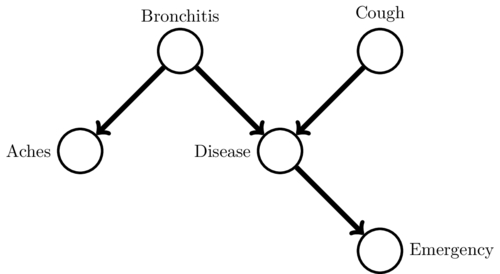

In [4]:
%%tikz --scale 2 --size 500,300 -f jpg
\tikzstyle{vertex}=[circle, draw=black, fill=white, line width=0.5mm, minimum size=25pt, inner sep=0pt]
\tikzstyle{edge} = [draw, line width=1mm, ->]

\node[vertex,label=left:{Aches}] (a) at (0,0) {};
\node[vertex,label=above:{Bronchitis}] (b) at (1,1) {};
\node[vertex,label=above:{Cough}] (c) at (3,1) {};
\node[vertex,label=left:{Disease}] (d) at (2,0) {};
\node[vertex,label=right:{Emergency}] (e) at (3,-1) {};

\foreach \source/ \dest in {b/a, b/d, c/d, d/e}
        \path[edge] (\source) -- (\dest);

How much memory is needed to store the joint probability distribution? Identify the conditional independences in the graph. Consider both cases: when variables are observed and when they are unobserved. 

*A random variable $X$ is independent of $Y$ given $Z$ (written $X\perp Y | Z$) if and only if
$$p(X|Y,Z) = p(X|Z).$$
Equivalently this can be seen as a generalisation of the factorisation property when you have independence,
\begin{align*}
    p(X,Y|Z) &  = p(X|Y,Z) p(Y|Z)\\
    &           = p(X|Z) p(Y|Z)
\end{align*}
The first equality above is just the product rule.*

By observing the structure of the graphical model and using the sum rule and product rule, prove the conditional independences that you have identified.

### Solution

Some examples:
* $A\perp D | B$
* $B\perp C | \emptyset$

Example proof $A\perp D | B$:
\begin{align}
p(A,D | B) &= \frac{p(A,B,D)}{p(B)}\\
&=\frac{p(A|B)p(D|B)p(B)}{p(B)}\\
&=p(A|B)p(D|B)
\end{align}

Consider the following tables.

|$p(B)$ | B=n | B=m | B=s |
|:-----:|:--:|:--:|:--:|
|marginal| 0.97 | 0.01 | 0.02 |

|$p(C)$ | C=False | C=True |
|:-----:|:--:|:--:|
|marginal| 0.7 | 0.3 |

| $p(A|B)$ | B=n | B=m | B=s |
|:-----:|:--:|:--:|:--:|
|**A**=False |0.9|0.8|0.3|
|**A**=True |0.1|0.2|0.7|

| $p(D|B,C)$ | B=n, C=F | B=m, C=F | B=s, C=F | B=n, C=T | B=m, C=T | B=s, C=T |
|:-----:|:--:|:--:|:--:|:--:|:--:|:--:|
|**D**=healthy   |0.9 |0.8 |0.1 |  0.3 |0.4 |0.01|
|**D**=carrier   |0.08|0.17|0.01|  0.05|0.05|0.01|
|**D**=sick      |0.01|0.01|0.87|  0.05|0.15|0.97|
|**D**=recovering|0.01|0.02|0.02|  0.6 |0.4 |0.01|

| $p(E|D)$ | D=h | D=c | D=s | D=r |
|:-----:|:--:|:--:|:--:|
|**E**=False |0.99|0.99|0.4|0.9|
|**E**=True |0.01|0.01|0.6|0.1|


Compute the following:
* p(A,B,C,D,E)
* p(E)
* p(E|B=s)
* p(E|B=s, C=T)

Note that there are two ways of arriving at the distributions:
1. By computing p(A,B,C,D,E) and marginalising and conditioning appropriately
2. By only computing the required distributions directly using the graphical model structure.
Check that both ways give the same answer.